# Assignment 1
Name: Jaimon Thypramabil Thomas
<br>StudentID : 29566428

### Library Used

In [1]:
library(reshape2) # used for melt function
library(ggplot2) # used for generating plots

Warning message:
"package 'reshape2' was built under R version 3.6.3"Warning message:
"package 'ggplot2' was built under R version 3.6.3"

## Section D. Ridge Regression
#### In this section, you develop Ridge Regression by adding the L2 norm regularization to the linear regression (covered in Activity 1 of Module 2) and study the effect of the L2 norm regularization on the training and testing errors. This section assesses your mathematical skills (derivation), programming, and analytical skills.
### Question 5 [Ridge Regression, 25 Marks]
#### I. Given the gradient descent algorithms for linear regression (discussed in Chapter 2 of Module 2), derive weight update steps of stochastic gradient descent (SGD) for linear regression with L2 regularisation norm. Show your work with enough explanation in your PDF report; you should provide the steps of SGD.
#### Hint: Recall that for linear regression we defined the error function E. For this assignment, you only need to add an L2 regularization term to the error function (error term plus the regularization term). This question is similar to Activity 1 of Module 2.

#### General Overview of Algorithm

<ol>
    <li>Choose and implement a basis function $\pmb{\phi}$, and initialize weight vector $\pmb{w}$, learning rate $\eta$ and termination threshold $\epsilon$.</li>
	<li> Use the above function and repeat the following until the difference between the old and new weight vectors becomes small (i.e., $d(\pmb{w}^{\tau+1}, \pmb{w}^{\tau}) \leq\epsilon$) or max no of iteration is reached:
<ol>
	<li>Shuffle the training data</li>
	<li>For each datapoint in the training data do:
<ol>
<li>$\pmb{w}^{(\tau+1)} := \pmb{w}^{(\tau)} + \eta ((t - {\pmb{w}^{(\tau)}}.\pmb{\phi}_n) \pmb{\phi}_n - \lambda*\pmb{w}^{(\tau)})$</li>
</ol>
</li>

detailed derivation of algorithm is available in the report pdf

#### II. Using R (with no use of special libraries), implement an SGD algorithm that you derived in Step I. The implementation is straightforward as you are allowed to use the code examples provided.

In [2]:
# auxiliary function to calculate labels based on the estimated coefficients
predict_func <- function(Phi, w){
    #%*% does matrix multiplication on phi and w
    return(Phi%*%w)
} 

# auxiliary function to calculate a cost function
error_func <- function (Phi, w, label,lambda){
  return((sum((predict_func(Phi, w) - label)^2)+(lambda*sum(w^2)))/2)
}

#Function applying stocastic gradient descent using l2 regularisation
sgd.l2 <- function(train.data,train.label,test.data,test.label,lam = 0){
    
    train.len = nrow(train.data)
    
    # project data using a basis function (identical here)
    Phi <- as.matrix(cbind('X0'=1, train.data)) # add a column of 1 as phi_0

    T <- train.label # rename just for conviniance
    tau.max <- 20 * nrow(train.data) # maximum number of iterations
    global_eta <- 0.00001 # learning rate
    epsilon <- 0.1 * mean(T) # a threshold on the cost (to terminate the process)

    W <- matrix(,nrow=tau.max, ncol=ncol(Phi)) # be used to store the estimated oefficients
    W[1,] <- runif(ncol(Phi)) # initial weight (any better idea?)
    
    tau <- 1 # iteration counter
    terminate <- FALSE
    while(!terminate){
      # check termination criteria:
      terminate <- tau >= tau.max | error_func(Phi, W[tau,],T,lam)<=epsilon

      # shuffle data:
      train.index <- sample(1:train.len, train.len, replace = FALSE)
      # project data using a basis function (identical here)
      Phi <- as.matrix(cbind('X0'=1, train.data)) # add a column of 1 as phi_0
      Phi <- Phi[train.index,]
      T <- train.label[train.index]

      # for each datapoint:
      for (i in 1:train.len){
        # check termination criteria:
        if (tau >= tau.max | error_func(Phi, W[tau,],T,lam)<=epsilon) {terminate<-TRUE;break}

        t_pred = predict_func(Phi[i,], W[tau,])
        eta <- global_eta 
        
        #Commenting Alog 2 and using Algo 1 instead as Algo 2 take lot of time
        #Algo 2 Starting
        #Commenting the while loop section as it is takes lot of time [Algo 2]
        #temp.terminate = TRUE
          #while(temp.terminate){
          # for each coefficient:
          #for (j in 1: ncol(W)){
            # update the coefficient:
           # W[(tau+1),j] <- W[tau,j] + (eta * (((T[i]-t_pred) * Phi[i,j]) + (lam*W[tau,j]) ))
          #}
         #temp.terminate = error_func(Phi, W[tau+1,],T,lam) > error_func(Phi, W[tau,],T,lam)
         # eta = eta/2;
        #}
        #Algo 2 ending
          
          #Algo 1 starting
          for (j in 1: ncol(W)){
            # update the coefficient by including the regularisation constant:
            W[(tau+1),j] <- W[tau,j] + (eta * (((T[i]-t_pred) * Phi[i,j]) - (lam*W[tau,j]) ))

          }
          #Algo 1 ending

        # update the counter:
        tau <- tau + 1        
      }
    #calculating the training and testing error
    train.error = error_func(as.matrix(cbind(1, train.data)), W[tau-1,],train.label,lam)
    test.error <- error_func(as.matrix(cbind(1, test.data)), W[tau-1,],test.label,lam) 
  }
  return(c(train.error,test.error))
}

#### III. Now let’s study the effect of the L2 norm regularization on the training and testing errors:
#### a. Load Task1C_train.csv and Task1C_test.csv sets.

In [3]:
#Reading data from csv
task1C_train <- read.csv("Task1C_train.csv")
task1C_test <- read.csv("Task1C_test.csv")
#scaling the data
task1C_test <- scale(task1C_test)
task1C_train <- scale(task1C_train)
head(task1C_test)

x1,x2,x3,x4,y
-1.726588,-0.9696697,-1.091952,-0.7673567,0.4293234
-1.719303,-1.0013013,-1.118889,-0.8552335,-1.7823355
-1.712017,-0.9973485,-1.118889,-0.8737189,-1.7507985
-1.704732,-1.0028614,-1.116719,-0.8444266,1.2674840
-1.697447,-1.0157455,-1.122806,-0.8663248,-1.5075454
-1.690162,-1.0123448,-1.136004,-0.9050019,0.0759734


In [4]:
#spliting into data and label for training and testing data
trainC.data <- task1C_train[, -5]
trainC.label <- task1C_train[, 5]
testC.data <- task1C_test[, -5]
testC.label <- task1C_test[, 5]

#### b. For each lambda in {0, 0.4, 0.8, …, 10}, build a regression model and compute the training and testing errors, using the provided data sets. While building each model, all parameter settings (initial values, learning rate, etc) are exactly the same, except a lambda value. Set the termination criterion as maximum of 20 x N weight updates (where N is the number of training data). Create a plot of error rates (use different colors for the training and testing errors), where the x-axis is log lambda and y-axis is the error rate. Save your plot in your Jupyter Notebook file for Question 5.

In [5]:
#function used to execute for each value of lambda in lambda series
getlambdavserrors <- function(train.data,train.label,test.data,test.label,lambda.series){
    error <- data.frame('lambda'=1:length(lambda.series), 'test'=rep(0,length(lambda.series)),'train'=rep(0,length(lambda.series)))
    for (i in 1:length(lambda.series)){
        error[i,'lambda'] = lambda.series[i]
        temp.error = sgd.l2(train.data,train.label,test.data,test.label,lambda.series[i])
        error[i,'train'] = temp.error[1]
        error[i,'test'] = temp.error[2]
    }
    return(error)
}

In [6]:
#function used to generate a series of no between start and end increased by a factor
getseries <-function(start,end,factor){
    temp = 0
    i=start
    while(i<=end){
        if(i==start) { temp = start }
        else { temp = c(temp,i) }
        i =i+factor
    } 
    return(temp)
}

In [7]:
set.seed(1234) # to make the results of stochastic methods reproducible
lambda.series = getseries(0,10.1,0.4)
error = getlambdavserrors(trainC.data,trainC.label,testC.data,testC.label,lambda.series)

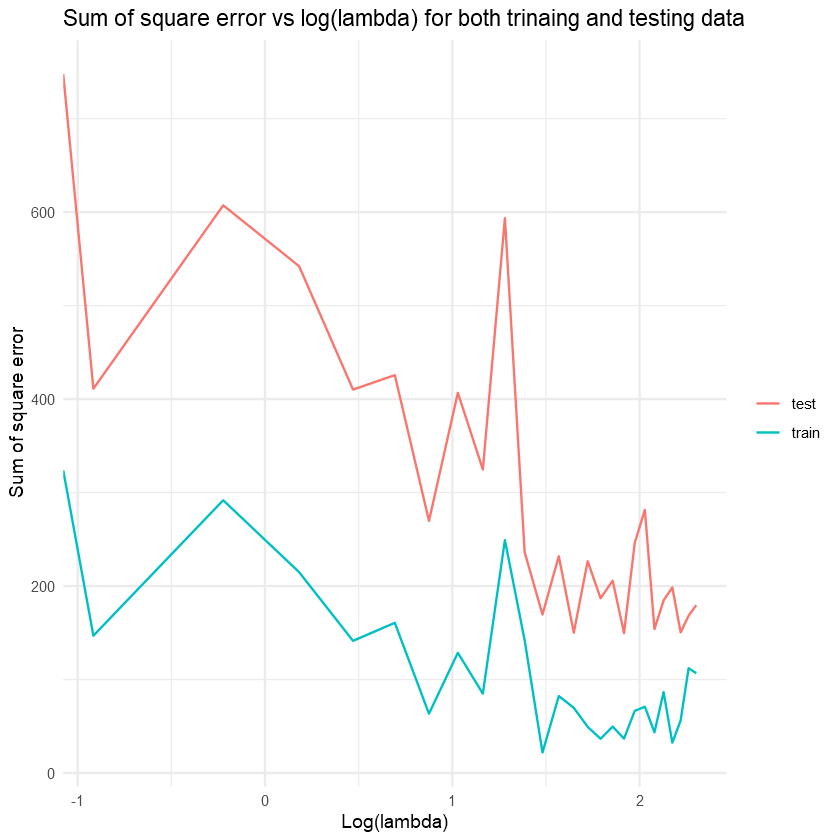

In [8]:
#plotting the sum of square error vs log lambda for both trinaing and testing data
#note that the sum of square is caluculated by also considering value of lambda
error.m <- melt(error, id='lambda') # reshape for visualization
names(error.m) <- c('lambda', 'type', 'error')
ggplot(data=error.m, aes(x=log(lambda), y=error, color=type)) + geom_line() +
       scale_color_discrete(guide = guide_legend(title = NULL)) + theme_minimal() +
       labs( title= "Sum of square error vs log(lambda) for both trinaing and testing data", y="Sum of square error",
           x = "Log(lambda)")

#### c. Based on your plot in the previous part (Part b), what’s the best value for lambda? Discuss lambda, model complexity, and error rates, corresponding to underfitting and overfitting, by observing your plot. (Include all your answers in your Jupyter Notebook file.)

In [9]:
#function used to find the min value
#params
#dataframe - data frame used
#key.column.number - column no which has the Key in the data frame 
#value.column.number - column no which has the value in the data frame 
find.min.key <- function(dataframe, key.column.number = 1,value.column.number = 3){
    minVal = -1 #used to store the min value
    minK = NULL #used to store the Key of the min value
    for(i in 1:nrow(dataframe)) {
        if(minVal == -1){
            #intialising minval and key for the first entry
            minVal = dataframe[i,value.column.number]
            minK = dataframe[i,key.column.number]
        }
        else if(dataframe[i,value.column.number] < minVal){
            #updating the key and min value when current key has min value compare to previous val
            minVal = dataframe[i,value.column.number]
            minK = dataframe[i,key.column.number]
        }
    }
    return(minK)
}

In [12]:
minK = find.min.key(error, key.column.number = 1,value.column.number = 2)
cat("when we are considering only the test data ")
cat('The optimum value for lambda in terms of testing error is',minK,'as the testing error is minimum for this value.')

when we are considering only the test data The optimum value for lambda in terms of testing error is 6.8 as the testing error is minimum for this value.

From the plot we can see that as lambda increase the error rates decreases in general for both test and training data. For lesser value of lambda we can see that the model is more over fitting implying that the model is more complex because in lesser values we can see that even if the train error is less the test error is very high.  As lambda increases we can see that the model is becoming more and more simpler that is why along with train error even test error is decreasing. But after a point we can see that as lambda increases both train and test error is increasing indicating its moving towards under fitting and even more simpler model.